# Árboles binarios de busqueda
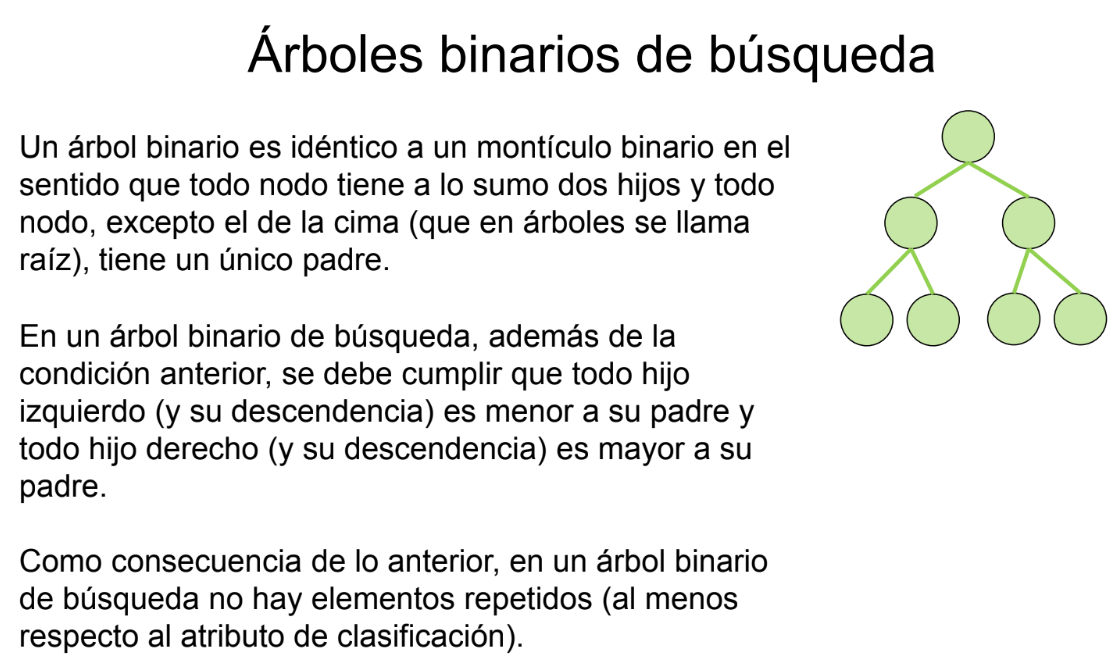
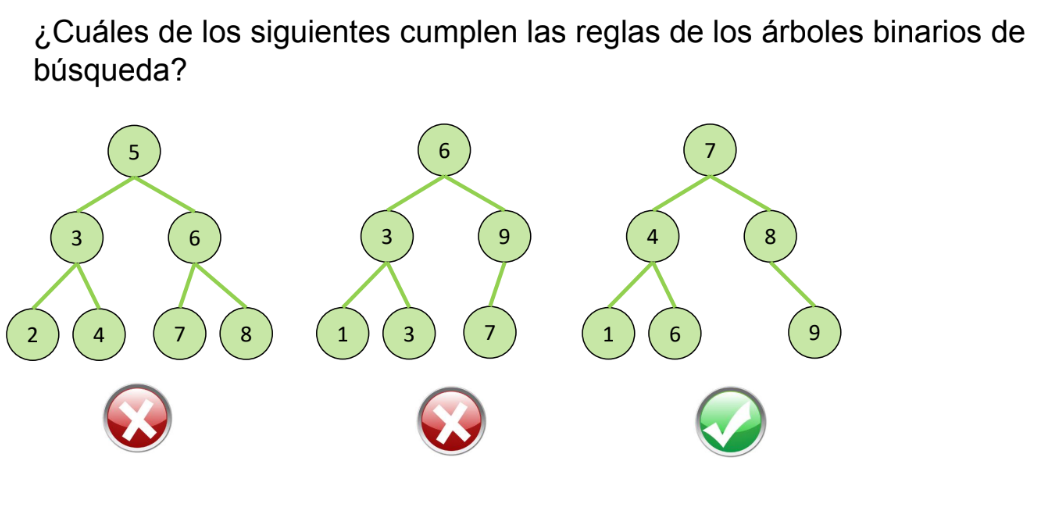
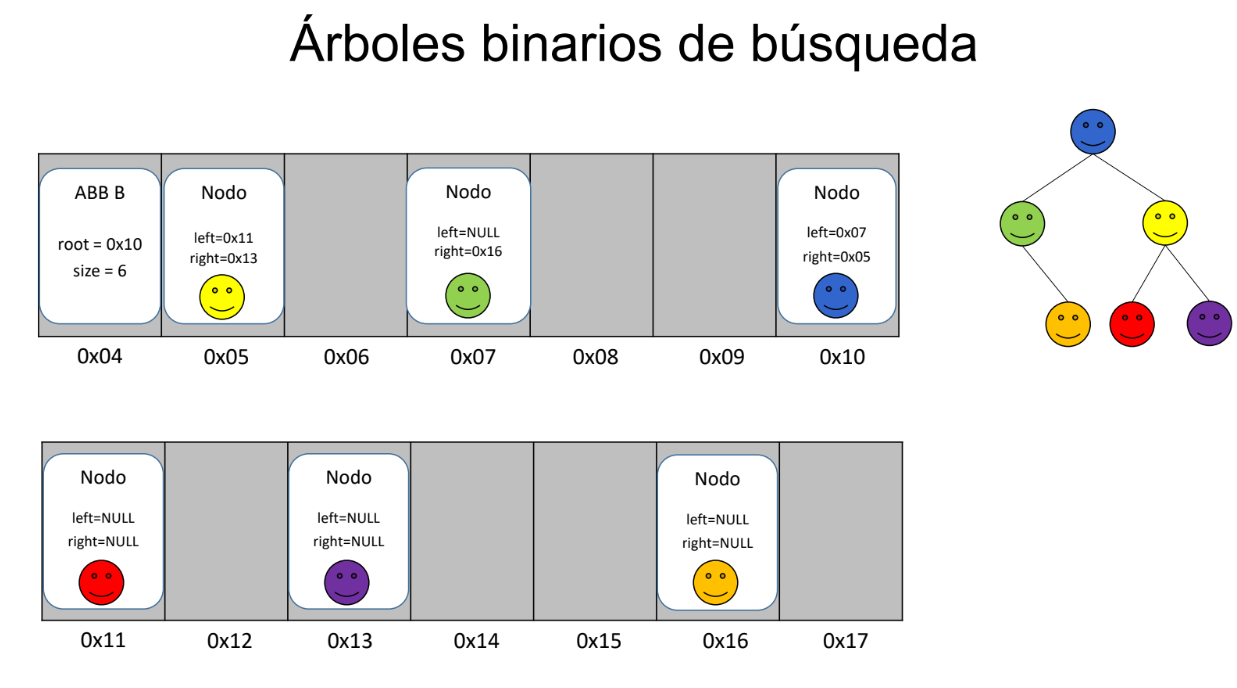

## Inserción
Al insertar un elemento se debe garantizar que se cumpla la
regla para mantener el orden.

Esto incluye la no existencia de elementos repetidos.

### Ejemplo
Vamos a incertar el 7, dado el arbol binario debusqueda
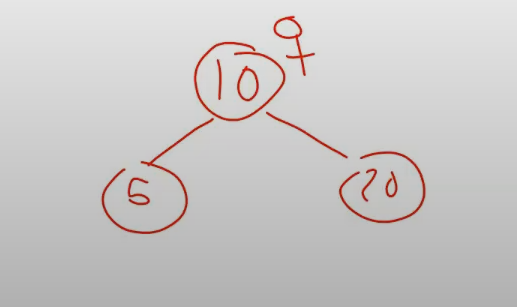

como 7 es menor a la raiz 10, entonces 7 debería ubicarse hacia la izquierda como esta ya está ocupada con el 5, entonces comparamos con este, 7>5 por lo que debe ubicarse a la derecha del 5 y como el espacio no está ocupado con otro nodo ahí quedaría
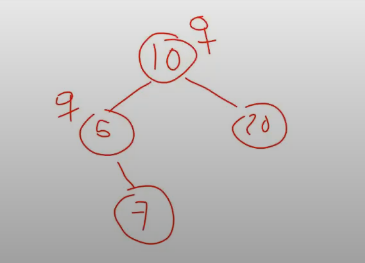
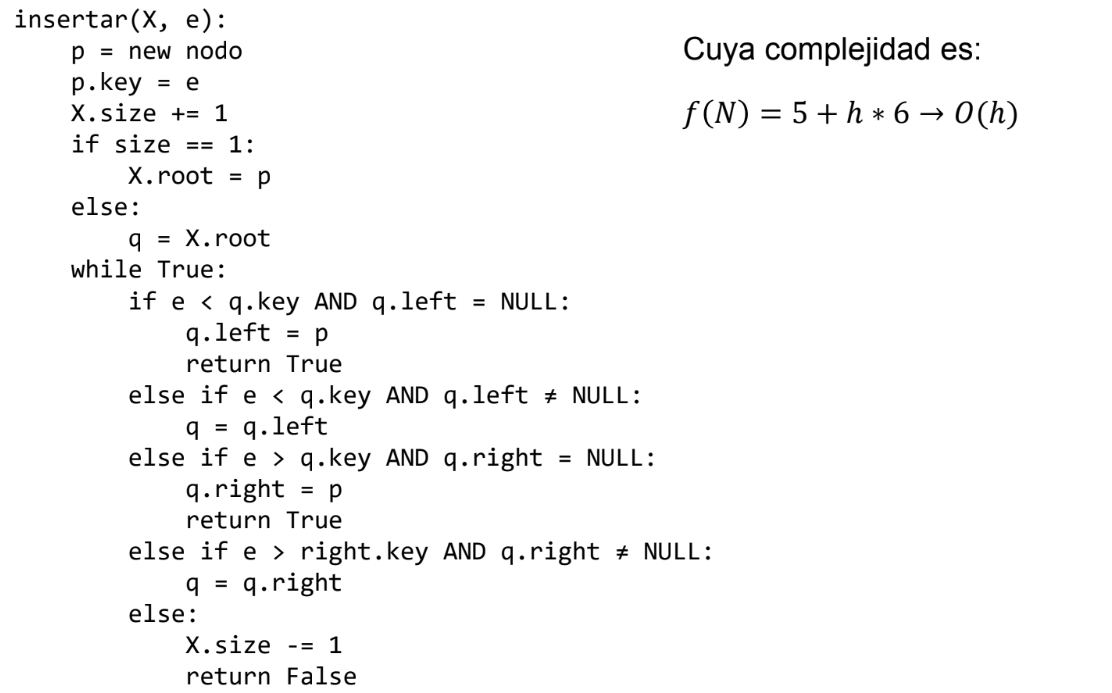

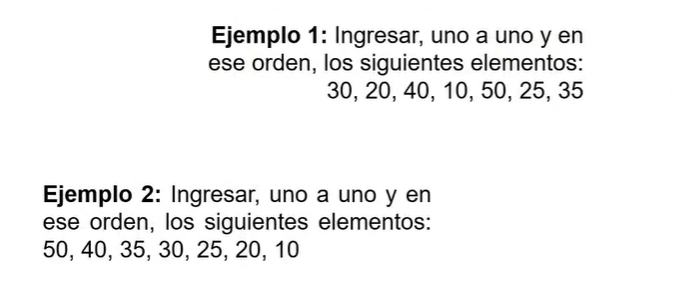
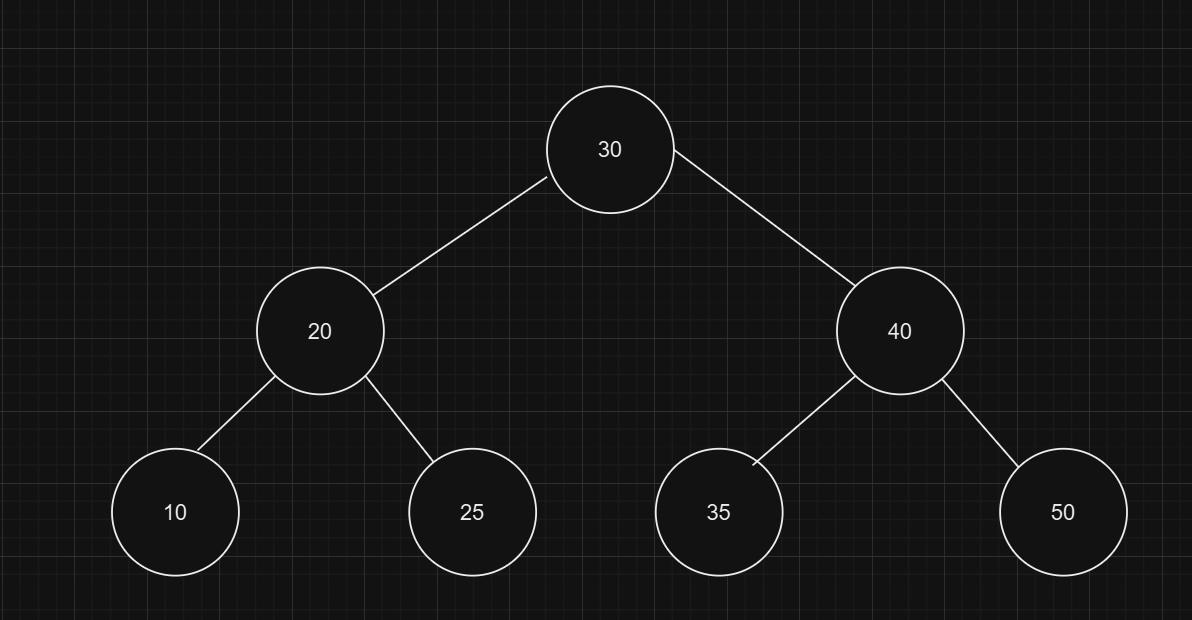
Ejemplo 2


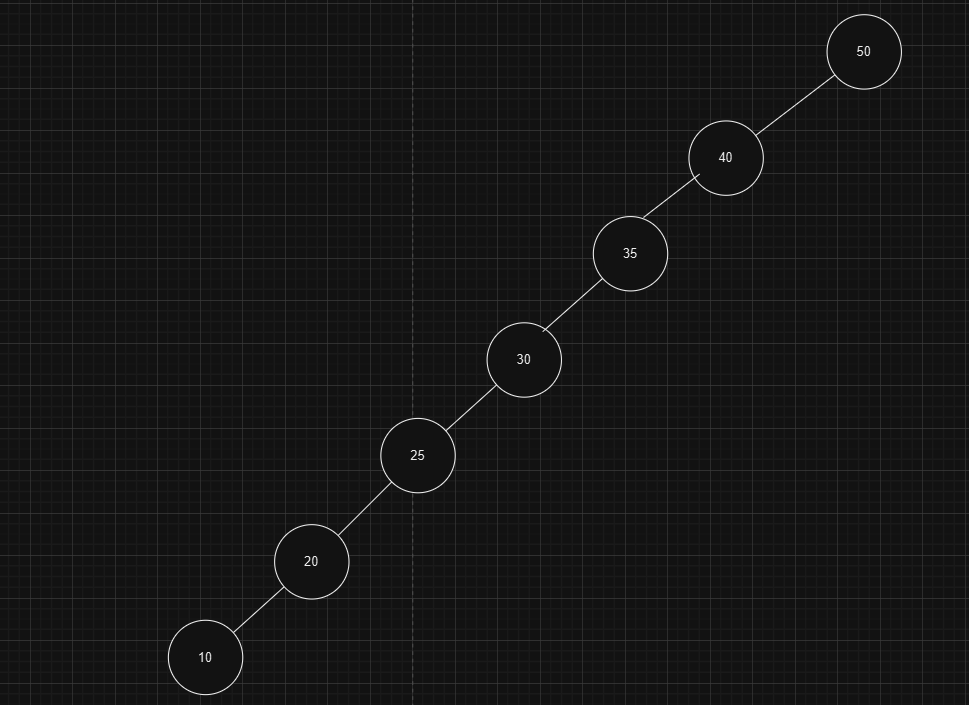

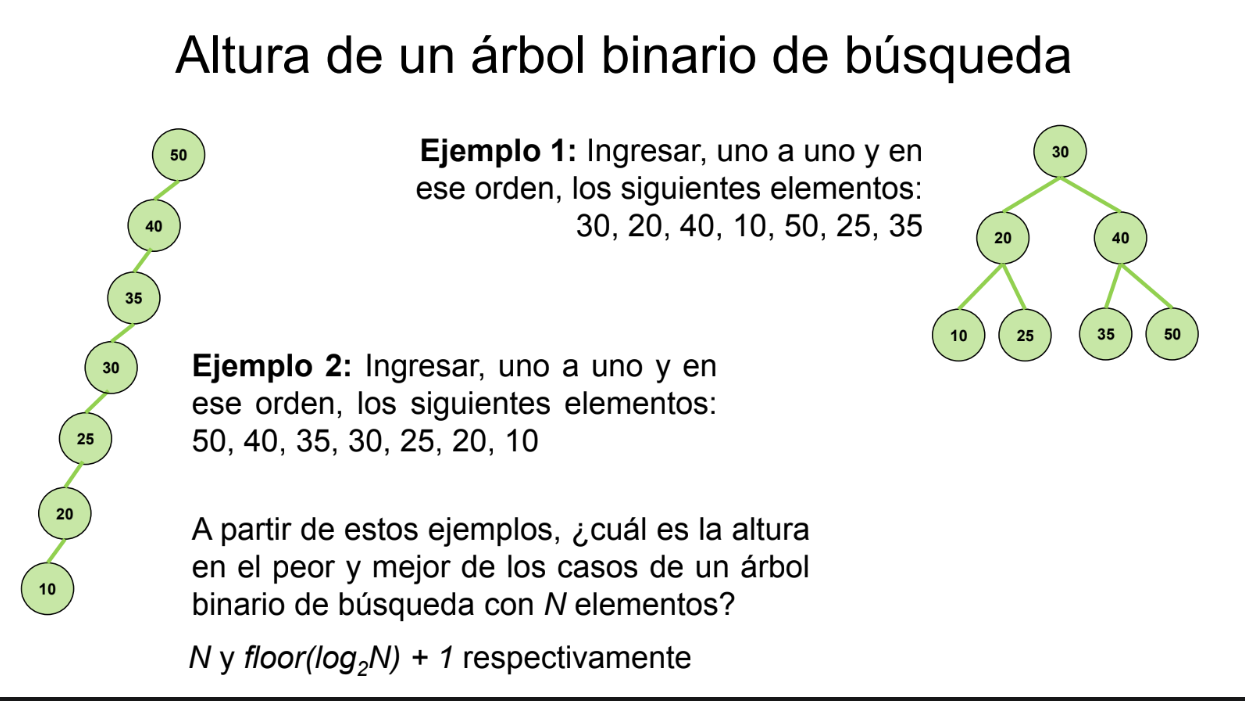

La complejidad es O(h), h es la altura del arbol que está entre floor(log(N))+1, en el mejor de los casos  y en el peor de los casos h es igual a numero de elementos del arbol 

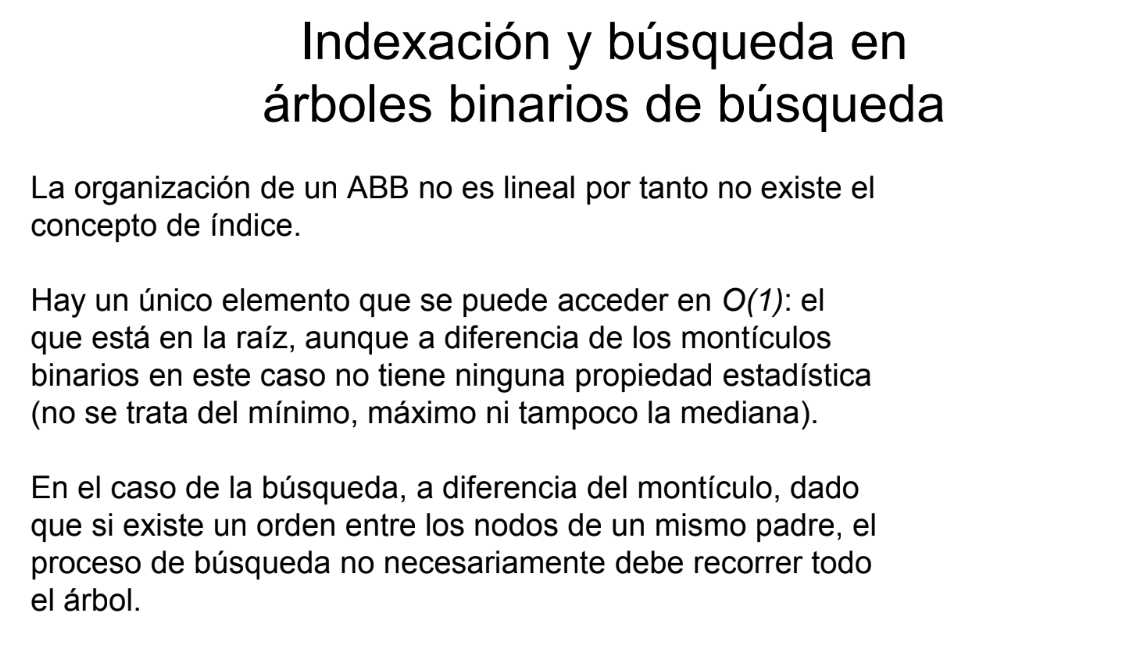

En estructuras no lineales como en este caso la indexación deja de tener sentido.

La busqueda si está el elemento me devolverá True, pero no indices

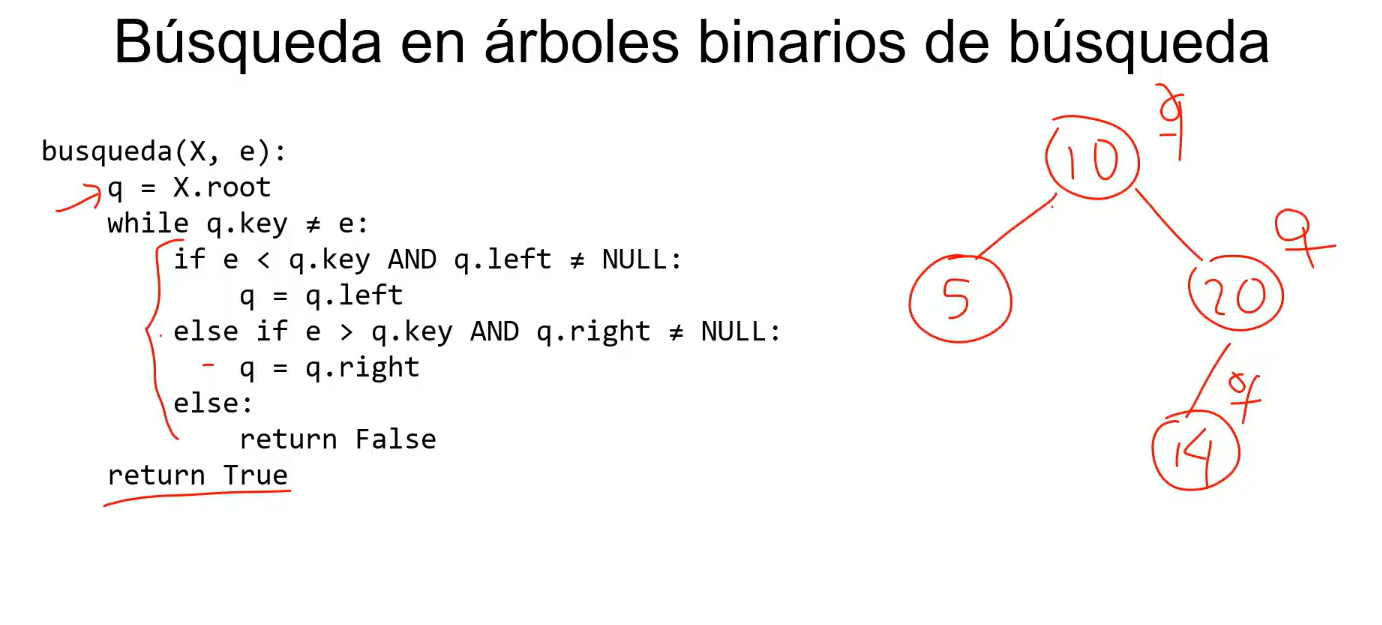

Complejidad O(h), h es la altura del arbol esta entre log(N) y N

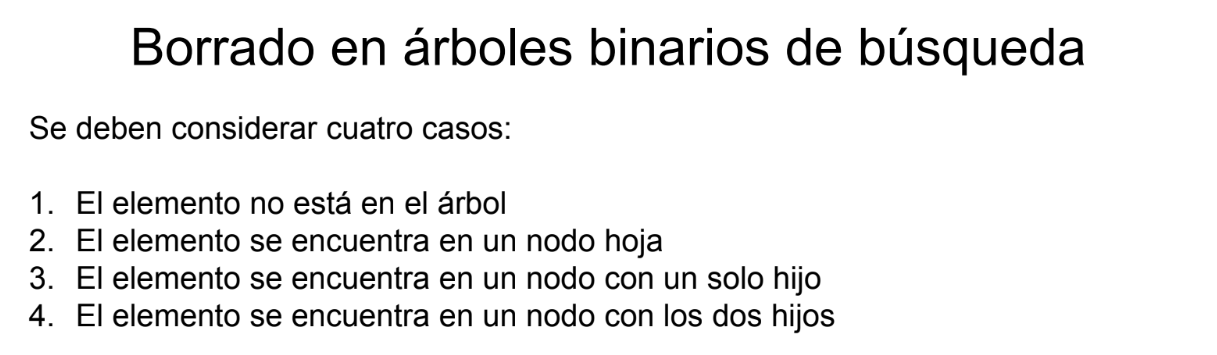

En el primer caso, buscamos si el elemento está en el árbol lo que toma O(h) y como no está no se puede borrar

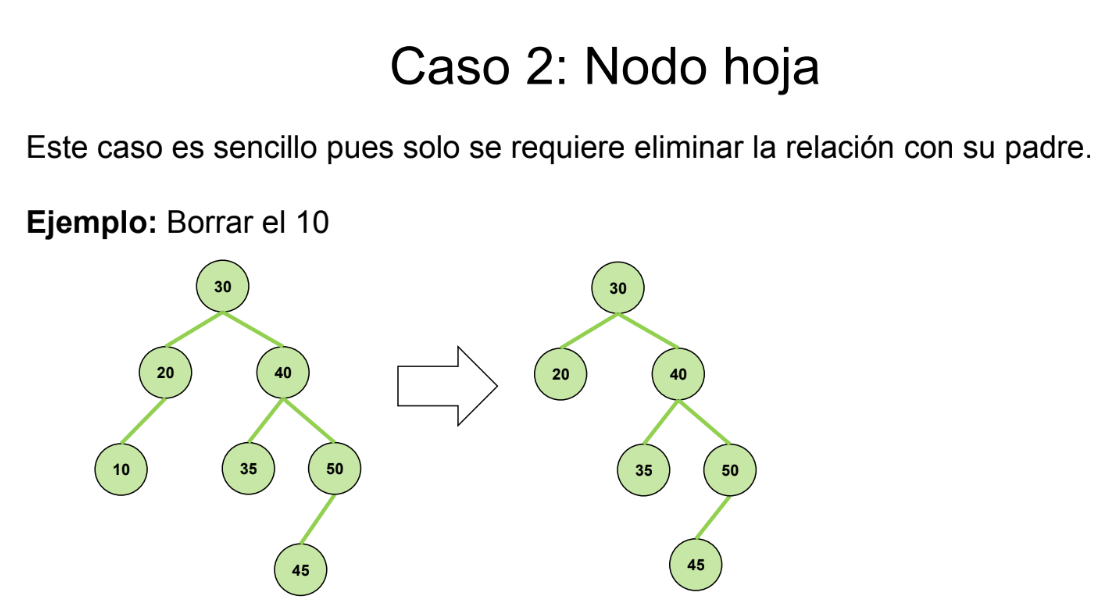
En el caso 2, un nodo hoja es aquel que no tiene ni hijo derecho e izquierdo, y la complejidad de borrarlo es lo que toma buscarlo + actualizar referencia y liberar memoria (una unica operacion O(1)), asi que en total la complejidad es O(h)

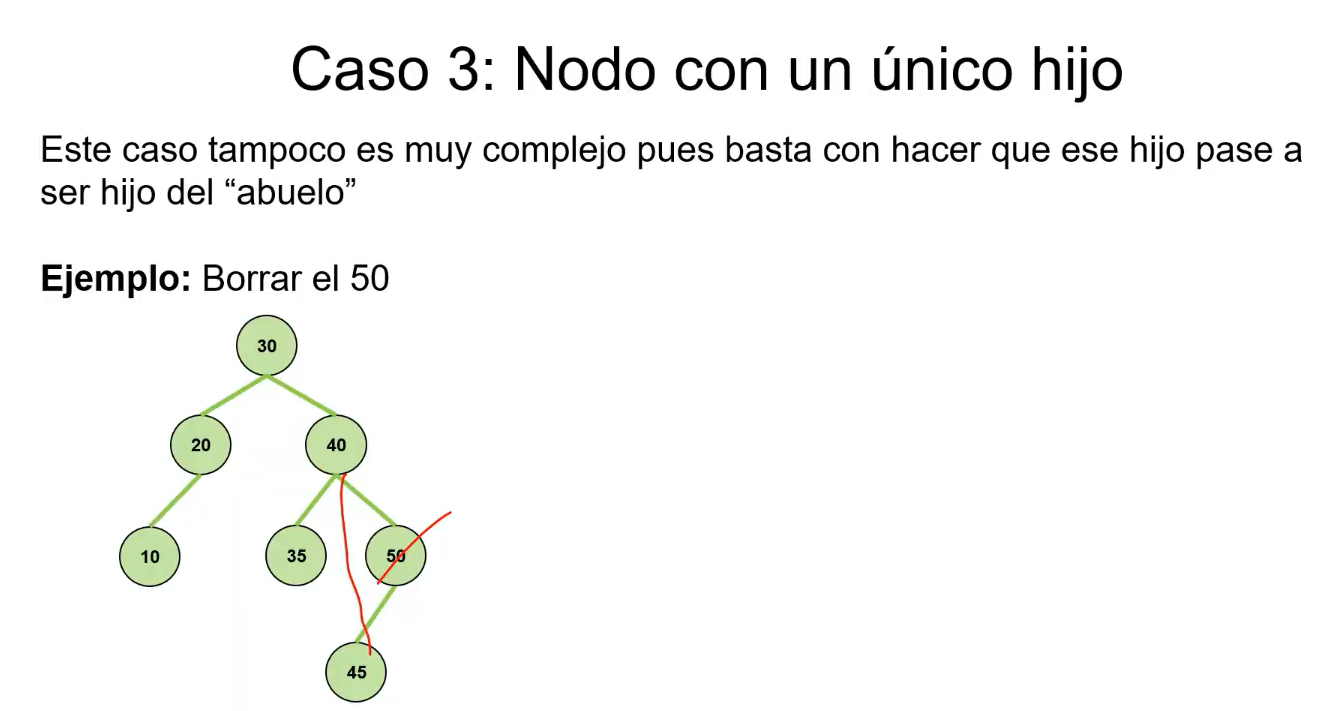

Se busca el elemento y se hace una reconexión, es O(h)

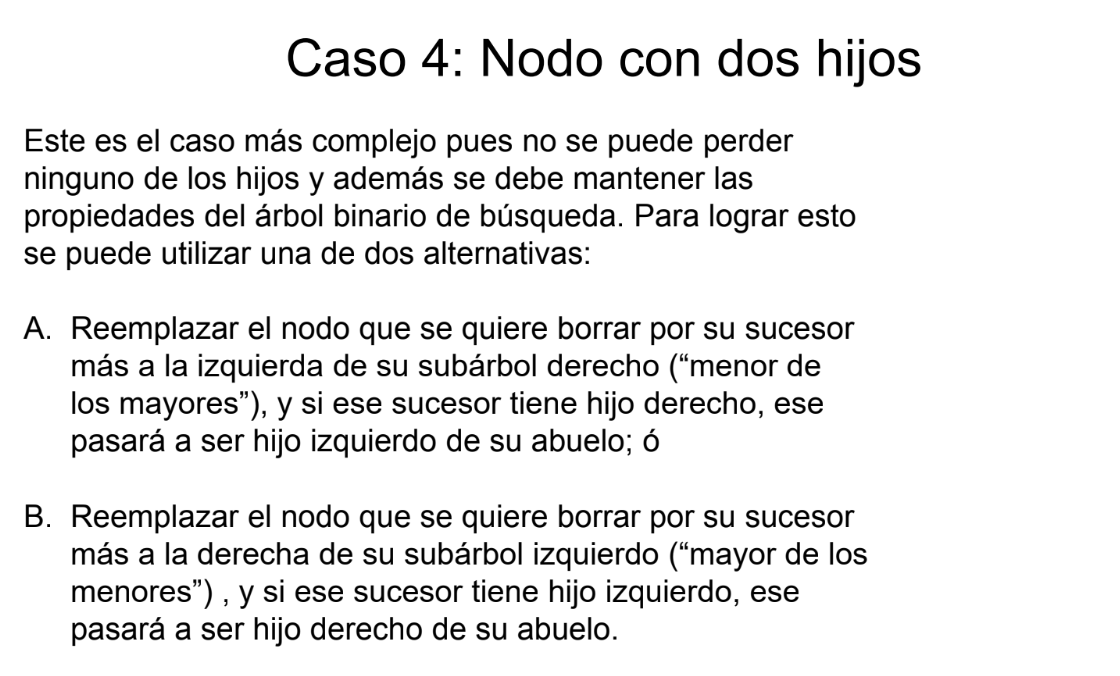
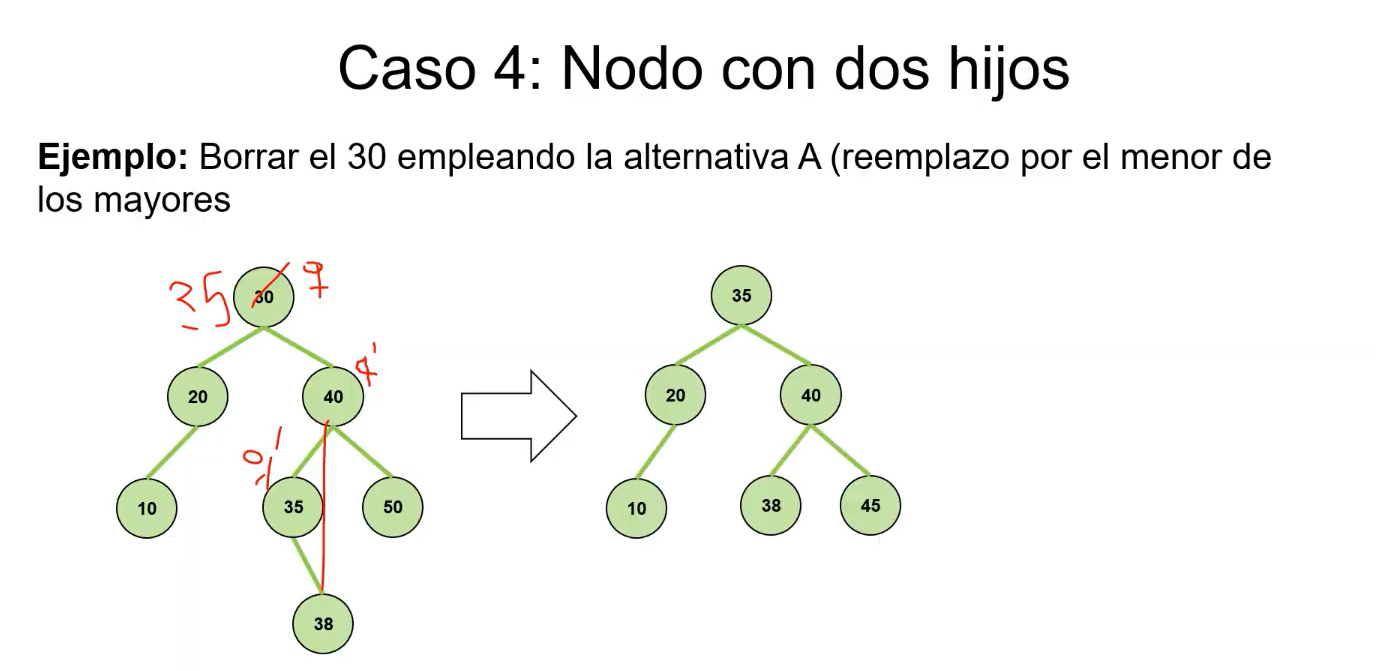

complejidad O(h) 

### Recorrido 

se trata de pasar por cada uno de los elementos del arbol
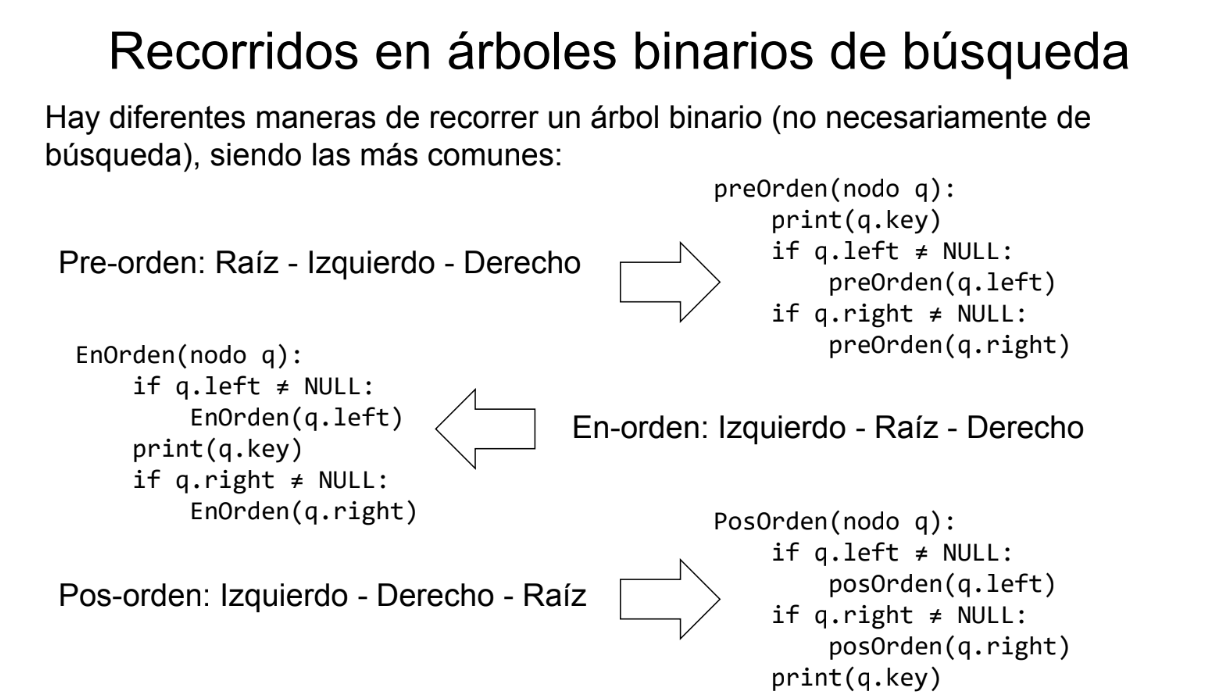

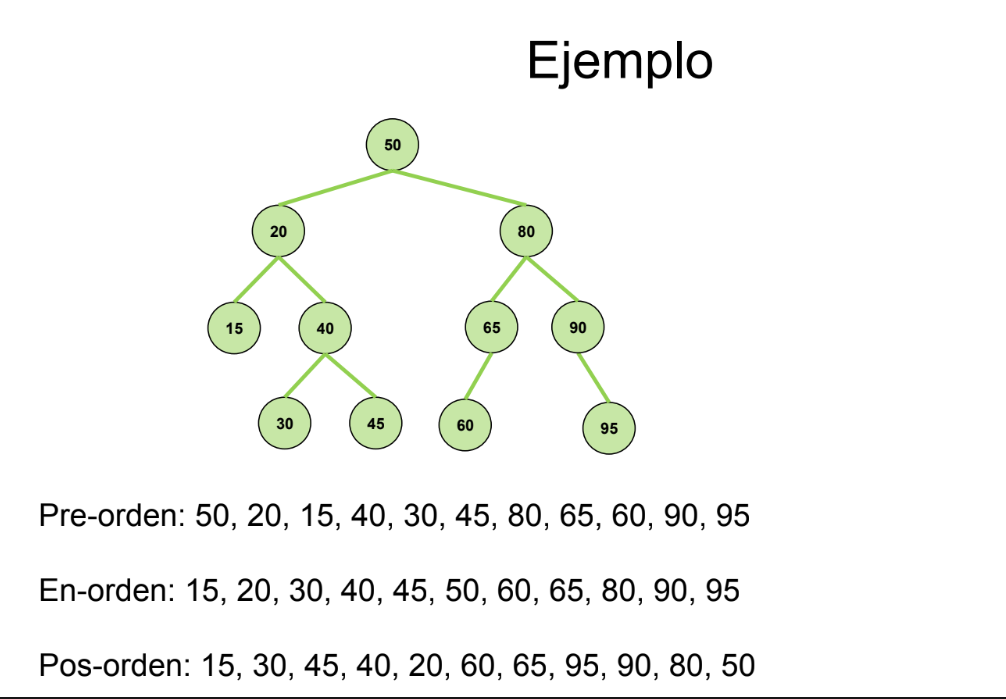

Notar que el recorrido en Orden me devuelve los elementos ordenados de manera ascendente.
También que si ingreso los elementos del recorrido en preorden para crear un nuevo arbol binario de busqueda, obtendría el mismo árbol 

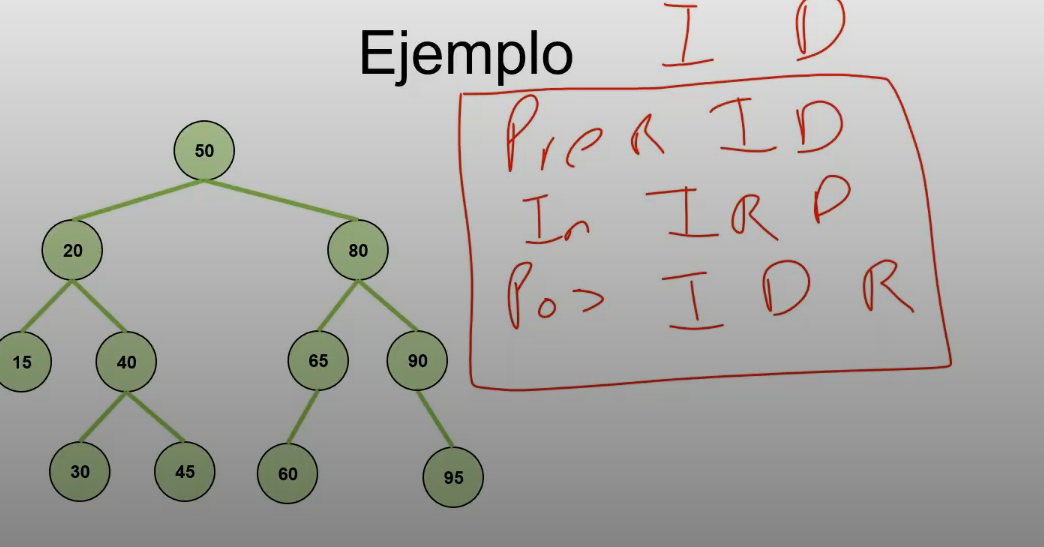

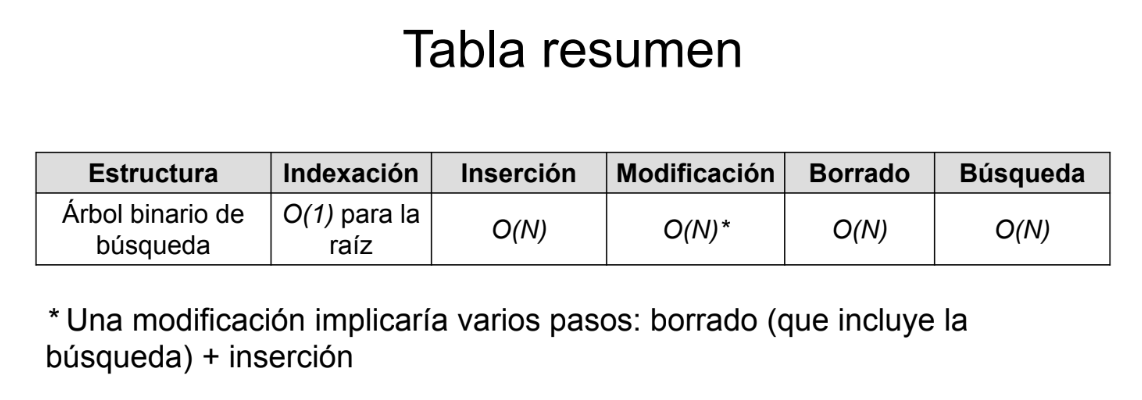
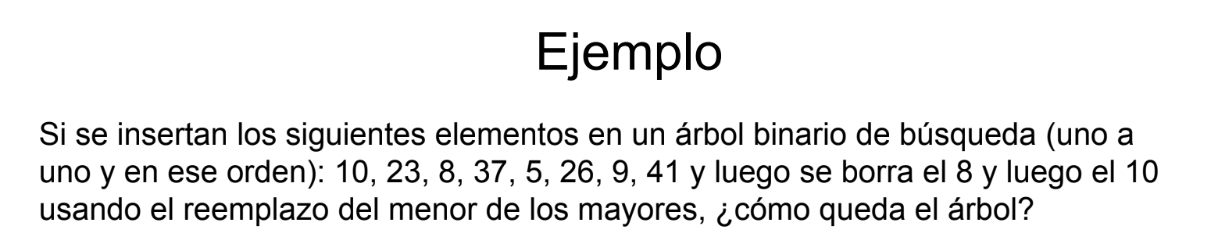
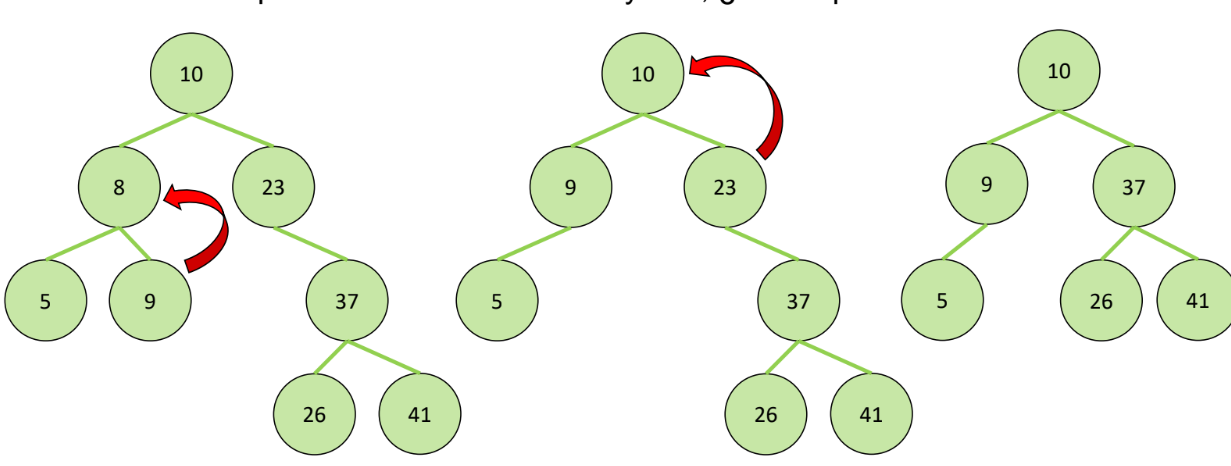

### Inserción

In [8]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, key):
        """
        Inserta un nuevo nodo con la clave 'key' en el árbol binario de búsqueda.
        """
        self.root = self._insertRecursively(self.root, key)

    def _insertRecursively(self, root, key):
        """
        Función recursiva para insertar un nodo en el árbol.
        Si el árbol está vacío, se crea un nuevo nodo.
        Si no, se compara la clave con la raíz y se mueve a la izquierda o derecha.
        """
        # Caso base: si el nodo está vacío, crea un nuevo nodo con la clave
        if root is None:
            return Node(key)

        # Inserta el nodo en el subárbol izquierdo si la clave es menor
        if key < root.key:
            root.left = self._insertRecursively(root.left, key)
        # Inserta el nodo en el subárbol derecho si la clave es mayor
        elif key > root.key:
            root.right = self._insertRecursively(root.right, key)

        return root

# Ejemplo de uso

bst = BinarySearchTree()
bst.insert(50)
bst.insert(30)
bst.insert(70)
bst.insert(20)
bst.insert(40)
bst.insert(60)
bst.insert(80)

    # Aquí podrías agregar un método adicional, como un recorrido, para mostrar el árbol.

# raíz 
print(bst.root.key)

print(bst.root.left.key)


50
30


### Busqueda

In [4]:
class BinarySearchTree:
    def __init__(self):
        self.root = None

    def search(self, key):
        """
        Busca si un nodo con la clave 'key' existe en el árbol.
        Retorna True si se encuentra, de lo contrario False.
        """
        return self._searchRecursively(self.root, key) is not None

    def _searchRecursively(self, root, key):
        """
        Función recursiva para buscar un nodo con la clave 'key'.
        Si el nodo es None o la clave coincide con el nodo actual, lo retorna.
        """
        # Caso base: si el nodo es None o la clave coincide con el nodo actual
        if root is None or root.key == key:
            return root

        # Busca en el subárbol izquierdo si la clave es menor
        if key < root.key:
            return self._searchRecursively(root.left, key)

        # Busca en el subárbol derecho si la clave es mayor
        return self._searchRecursively(root.right, key)

# Ejemplo de uso

bst = BinarySearchTree()
bst.root = Node(50)
bst.root.left = Node(30)
bst.root.right = Node(70)
bst.root.left.left = Node(20)
bst.root.left.right = Node(40)
bst.root.right.left = Node(60)
bst.root.right.right = Node(80)

print("Buscar 40:", bst.search(40))  # True
print("Buscar 25:", bst.search(25))  # False


Buscar 40: True
Buscar 25: False


### Borrado

In [5]:
class BinarySearchTree:
    def __init__(self):
        self.root = None

    def delete(self, key):
        """
        Elimina un nodo con la clave 'key' del árbol.
        """
        self.root = self._deleteRecursively(self.root, key)

    def _deleteRecursively(self, root, key):
        """
        Función recursiva para eliminar un nodo del árbol.
        """
        # Si el nodo es None, no hay nada que eliminar
        if root is None:
            return root

        # Busca el nodo a eliminar en el subárbol izquierdo si la clave es menor
        if key < root.key:
            root.left = self._deleteRecursively(root.left, key)

        # Busca el nodo a eliminar en el subárbol derecho si la clave es mayor
        elif key > root.key:
            root.right = self._deleteRecursively(root.right, key)

        # Si la clave coincide con la del nodo actual, elimina este nodo
        else:
            # Caso 1: El nodo no tiene hijo izquierdo
            if root.left is None:
                return root.right

            # Caso 2: El nodo no tiene hijo derecho
            elif root.right is None:
                return root.left

            # Caso 3: El nodo tiene dos hijos
            # Encuentra el nodo con el valor mínimo en el subárbol derecho
            root.key = self._minValueNode(root.right).key

            # Elimina el nodo sucesor en el subárbol derecho
            root.right = self._deleteRecursively(root.right, root.key)

        return root

    def _minValueNode(self, node):
        """
        Encuentra el nodo con el valor mínimo en el subárbol dado.
        """
        current = node
        while current.left is not None:
            current = current.left
        return current

# Ejemplo de uso
if __name__ == "__main__":
    bst = BinarySearchTree()
    bst.root = Node(50)
    bst.root.left = Node(30)
    bst.root.right = Node(70)
    bst.root.left.left = Node(20)
    bst.root.left.right = Node(40)
    bst.root.right.left = Node(60)
    bst.root.right.right = Node(80)

    print("Árbol antes de eliminar 50:")
    # Aquí podrías implementar un recorrido para mostrar el árbol

    bst.delete(50)

    print("Árbol después de eliminar 50:")
    # Aquí también podrías implementar un recorrido para mostrar el árbol


Árbol antes de eliminar 50:
Árbol después de eliminar 50:


### Recorrido

In [6]:
class BinarySearchTree:
    def __init__(self):
        self.root = None

    def inOrder(self):
        """
        Realiza un recorrido en orden (in-order) del árbol.
        Retorna una lista con los elementos en orden ascendente.
        """
        elements = []
        self._inOrderRecursively(self.root, elements)
        return elements

    def _inOrderRecursively(self, root, elements):
        """
        Función recursiva para realizar un recorrido en orden (in-order).
        """
        if root:
            # Primero recorre el subárbol izquierdo
            self._inOrderRecursively(root.left, elements)
            # Luego agrega el valor del nodo actual
            elements.append(root.key)
            # Finalmente, recorre el subárbol derecho
            self._inOrderRecursively(root.right, elements)

# Ejemplo de uso
if __name__ == "__main__":
    bst = BinarySearchTree()
    bst.root = Node(50)
    bst.root.left = Node(30)
    bst.root.right = Node(70)
    bst.root.left.left = Node(20)
    bst.root.left.right = Node(40)
    bst.root.right.left = Node(60)
    bst.root.right.right = Node(80)

    print("Recorrido en orden (in-order):", bst.inOrder())


Recorrido en orden (in-order): [20, 30, 40, 50, 60, 70, 80]


## Ejercicios


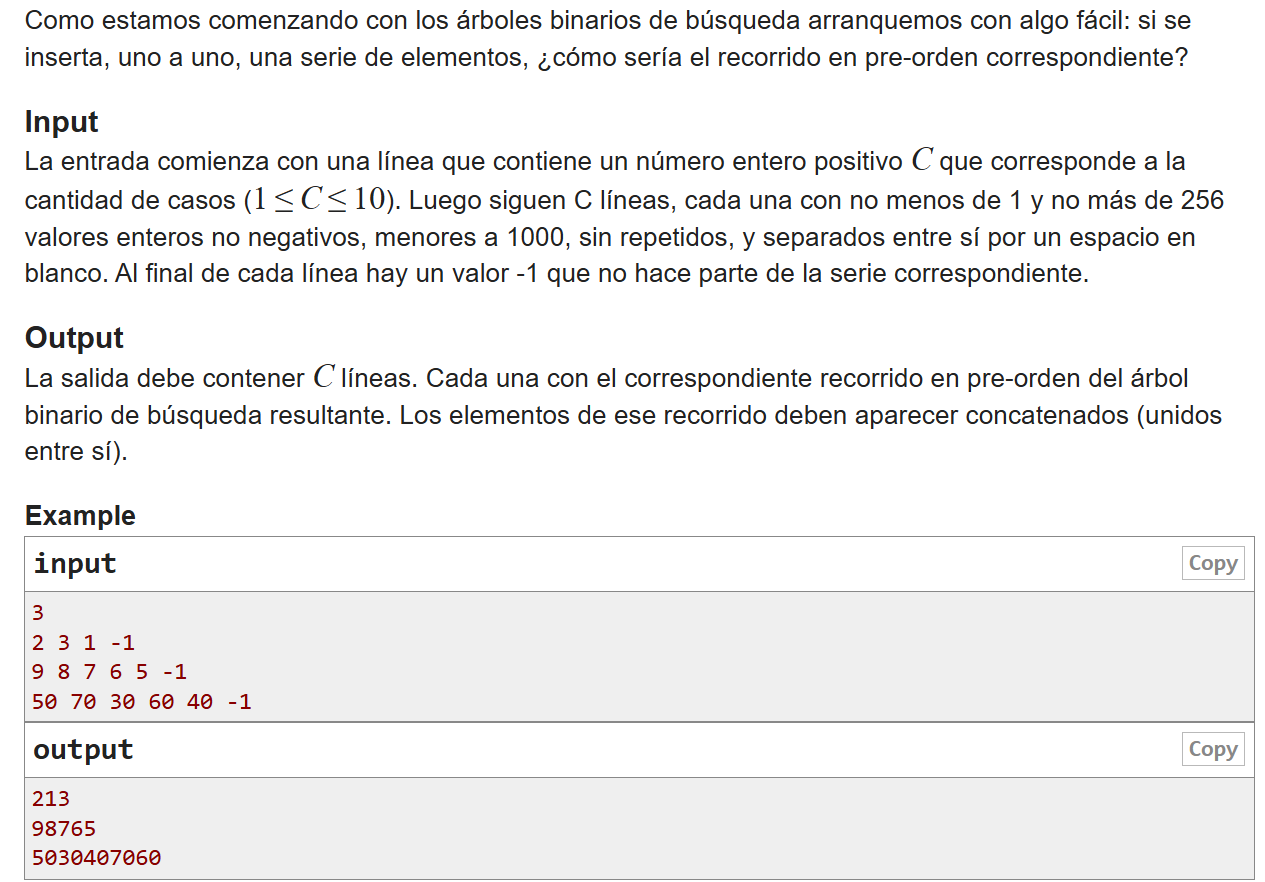

In [1]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None 
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None
        
    def insert(self, key):
        if not self.root:
            self.root = Node(key)
            return
        curr = self.root
        while True:
            if key < curr.key:
                if not curr.left:
                    curr.left = Node(key)
                    break
                curr = curr.left
            else:
                if not curr.right:
                    curr.right = Node(key)
                    break
                curr = curr.right
    
    def preorder(self):
        result = []
        def _preorder(node):
            if node:
                result.append(str(node.key))
                _preorder(node.left)
                _preorder(node.right)
        _preorder(self.root)
        return ''.join(result)

def main():
    C = int(input())
    for _ in range(C):
        nums = list(map(int, input().split()))
        bst = BinarySearchTree()
        for num in nums:
            if num == -1:
                break
            bst.insert(num)
        print(bst.preorder())

main()

213
98765
5030407060


### Ejercicio 2

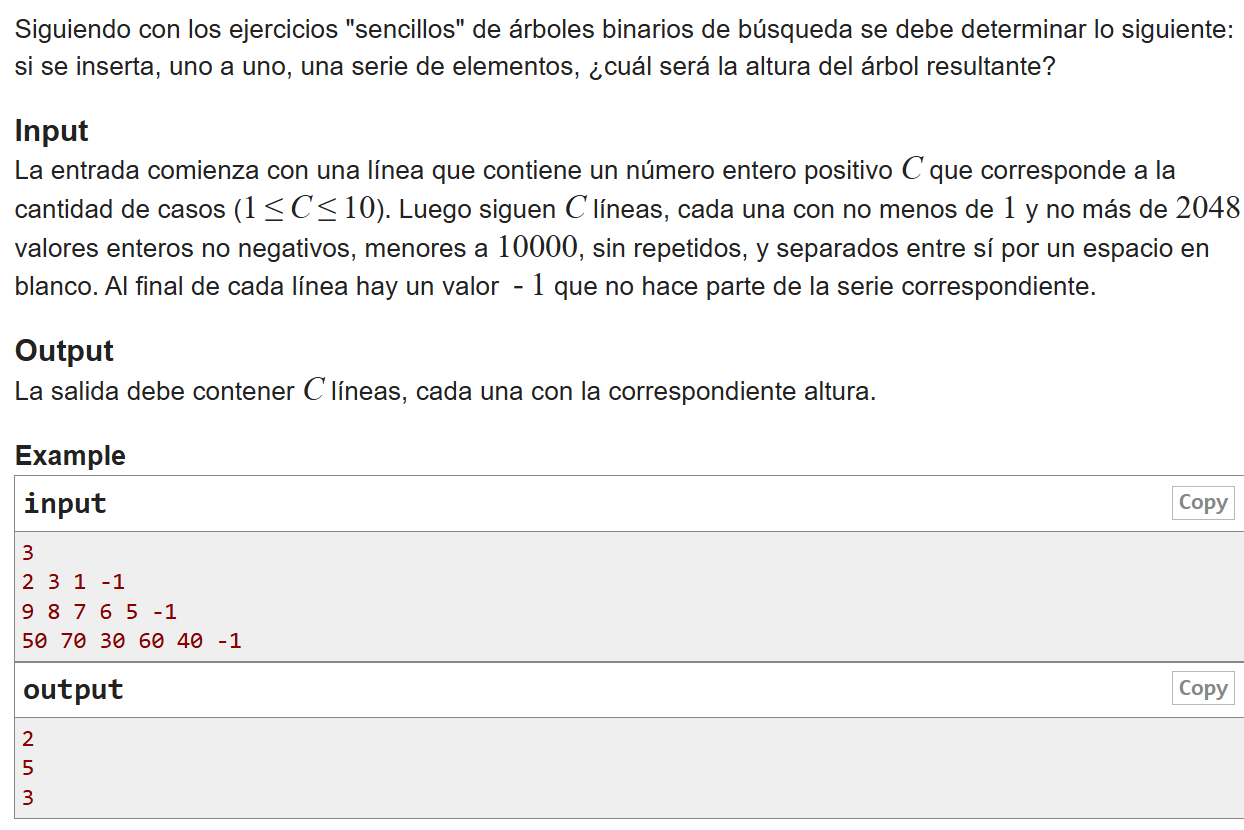

In [2]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None
        
    def insert(self, key):
        if not self.root:
            self.root = Node(key)
            return
        curr = self.root
        while True:
            if key < curr.key:
                if not curr.left:
                    curr.left = Node(key)
                    break
                curr = curr.left
            else:
                if not curr.right:
                    curr.right = Node(key)
                    break
                curr = curr.right
                
    def height(self):
        def calc_height(node):
            if not node:
                return 0
            return 1 + max(calc_height(node.left), calc_height(node.right))
        return calc_height(self.root)

def main():
    C = int(input())
    for _ in range(C):
        nums = list(map(int, input().split()))
        bst = BinarySearchTree()
        for num in nums:
            if num == -1:
                break
            bst.insert(num)
        print(bst.height())

main()

2
5
3


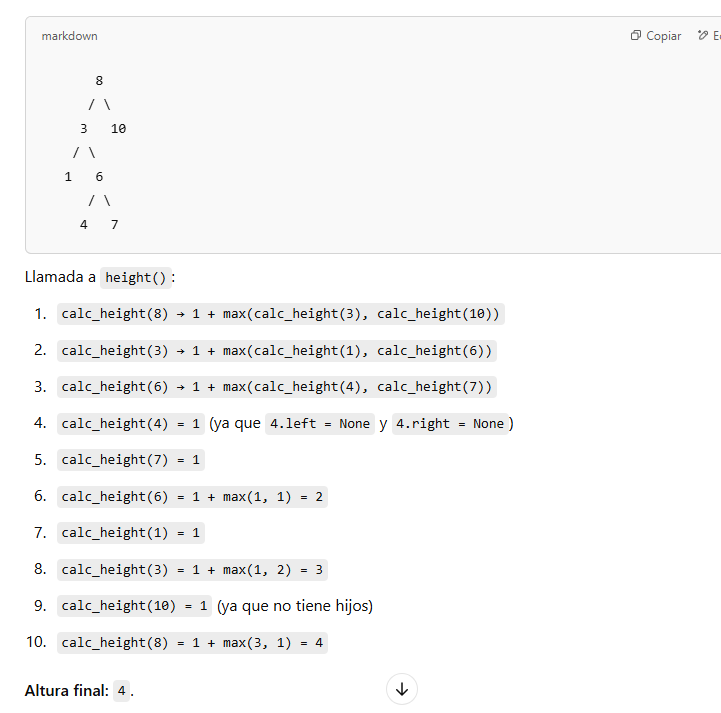

### Ejercicio 3

In [3]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None
    
    def insert(self, key):
        if not self.root:
            self.root = Node(key)
            return
        curr = self.root
        while True:
            if key < curr.key:
                if not curr.left:
                    curr.left = Node(key)
                    break
                curr = curr.left
            else:
                if not curr.right:
                    curr.right = Node(key)
                    break
                curr = curr.right
    
    def count_leaves(self):
        def _count_leaves(node):
            if not node:
                return 0
            if not node.left and not node.right:
                return 1
            return _count_leaves(node.left) + _count_leaves(node.right)
        return _count_leaves(self.root)

def main():
    C = int(input())
    for _ in range(C):
        nums = list(map(int, input().split()))
        bst = BinarySearchTree()
        for num in nums:
            if num == -1:
                break
            bst.insert(num)
        print(bst.count_leaves())

main()

2
1
2


### Ejercicio 4

In [4]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None
    
    def insert(self, key):
        if not self.root:
            self.root = Node(key)
            return
        curr = self.root
        while True:
            if key < curr.key:
                if not curr.left:
                    curr.left = Node(key)
                    break
                curr = curr.left
            else:
                if not curr.right:
                    curr.right = Node(key)
                    break
                curr = curr.right
    
    def count_single_children(self):
        def _count(node):
            if not node:
                return 0
            count = 0
            # Check if current node has exactly one child
            if (node.left and not node.right) or (node.right and not node.left):
                count = 1
            return count + _count(node.left) + _count(node.right)
        return _count(self.root)

def main():
    C = int(input())
    for _ in range(C):
        nums = list(map(int, input().split()))
        bst = BinarySearchTree()
        for num in nums:
            if num == -1:
                break
            bst.insert(num)
        print(bst.count_single_children())

main()

0
4
2


### Ejercicio 5

In [5]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None
    
    def insert(self, key):
        if not self.root:
            self.root = Node(key)
            return
        curr = self.root
        while True:
            if key < curr.key:
                if not curr.left:
                    curr.left = Node(key)
                    break
                curr = curr.left
            else:
                if not curr.right:
                    curr.right = Node(key)
                    break
                curr = curr.right
    
    def draw_tree(self):
        def _draw(node, level):
            if not node:
                return
            # Draw right subtree (appears at top)
            _draw(node.right, level + 1)
            # Draw current node
            print('\t' * level + str(node.key))
            # Draw left subtree (appears at bottom)
            _draw(node.left, level + 1)
            
        _draw(self.root, 0)

def main():
    C = int(input())
    for i in range(C):
        nums = list(map(int, input().split()))
        bst = BinarySearchTree()
        for num in nums:
            if num == -1:
                break
            bst.insert(num)
        bst.draw_tree()
        if i < C-1:  # Don't print newline after last case
            print()

main()

	3
2
	1

4
	3
		2
			1

		80
	70
		60
50
		30
	20
		10


### Ejercicio 6

In [6]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None
    
    def insert(self, key):
        if not self.root:
            self.root = Node(key)
            return
        curr = self.root
        while True:
            if key < curr.key:
                if not curr.left:
                    curr.left = Node(key)
                    break
                curr = curr.left
            else:
                if not curr.right:
                    curr.right = Node(key)
                    break
                curr = curr.right

    def is_complete(self):
        if not self.root:
            return True
            
        # Count nodes at each level
        levels = {}
        def count_level_nodes(node, level):
            if not node:
                return
            levels[level] = levels.get(level, 0) + 1
            count_level_nodes(node.left, level + 1)
            count_level_nodes(node.right, level + 1)
            
        count_level_nodes(self.root, 1)
        
        # Check if each level has correct number of nodes
        max_level = max(levels.keys())
        for level in range(1, max_level + 1):
            expected = 2 ** (level - 1)
            if level < max_level:
                if levels.get(level, 0) != expected:
                    return False
            else:  # Last level
                if levels.get(level, 0) != expected:
                    return False
        return True

def main():
    C = int(input())
    for _ in range(C):
        nums = list(map(int, input().split()))
        bst = BinarySearchTree()
        for num in nums:
            if num == -1:
                break
            bst.insert(num)
        print("completo" if bst.is_complete() else "no")

main()

completo
no
completo
